In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("dermatology_database_1.csv")

print("Formato do dataset:", df.shape)
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

df.head()

Formato do dataset: (366, 35)

Valores ausentes por coluna:
erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                    

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


/tmp/ipython-input-2592483861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="Set2")


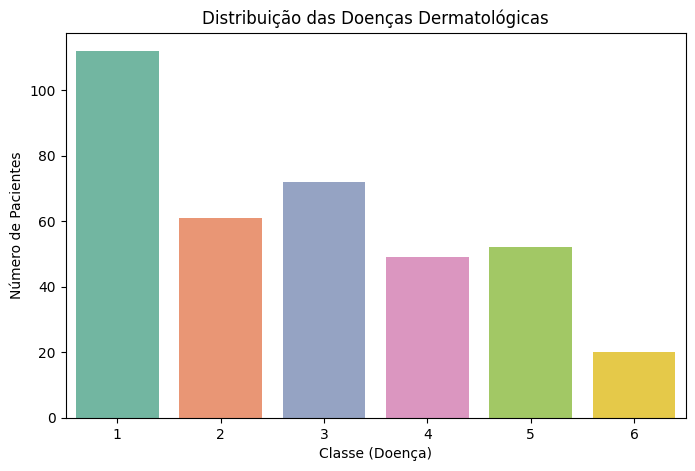

Distribuição das classes:
class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="class", data=df, palette="Set2")
plt.title("Distribuição das Doenças Dermatológicas")
plt.xlabel("Classe (Doença)")
plt.ylabel("Número de Pacientes")
plt.show()

print("Distribuição das classes:")
print(df["class"].value_counts())


In [ ]:
clinical_features = [
    'erythema','scaling','definite_borders','itching','koebner_phenomenon',
    'polygonal_papules','follicular_papules','oral_mucosal_involvement',
    'knee_and_elbow_involvement','scalp_involvement','family_history','age'
]

histo_features = [
    'melanin_incontinence','eosinophils_infiltrate','PNL_infiltrate','fibrosis_papillary_dermis',
    'exocytosis','acanthosis','hyperkeratosis','parakeratosis','clubbing_rete_ridges',
    'elongation_rete_ridges','thinning_suprapapillary_epidermis','spongiform_pustule',
    'munro_microabcess','focal_hypergranulosis','disappearance_granular_layer',
    'vacuolisation_damage_basal_layer','spongiosis','saw_tooth_appearance_retes',
    'follicular_horn_plug','perifollicular_parakeratosis','inflammatory_mononuclear_infiltrate',
    'band_like_infiltrate'
]

target = "class"

print("Número de variáveis clínicas:", len(clinical_features))
print("Número de variáveis histopatológicas:", len(histo_features))


Número de variáveis clínicas: 12
Número de variáveis histopatológicas: 22


In [ ]:
X_clinical = df[clinical_features]
X_histo = df[histo_features]
X_full = df[clinical_features + histo_features]

y = df[target]

print("Shape clínico:", X_clinical.shape)
print("Shape histopatológico:", X_histo.shape)
print("Shape completo:", X_full.shape)

Shape clínico: (366, 12)
Shape histopatológico: (366, 22)
Shape completo: (366, 34)


In [ ]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clinical, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamanho treino (clínico):", Xc_train.shape[0])
print("Tamanho teste (clínico):", Xc_test.shape[0])

Tamanho treino (clínico): 292
Tamanho teste (clínico): 74


In [ ]:
df = df.replace("?", np.nan)
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["age"] = df["age"].fillna(df["age"].median())

X_clinical = df[clinical_features]
X_histo = df[histo_features]
X_full = df[clinical_features + histo_features]
y = df[target]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clinical, y, test_size=0.2, random_state=42, stratify=y
)

print("Valores ausentes após tratamento:")
print(df.isnull().sum().sum())


Valores ausentes após tratamento:
0


In [ ]:
rf_clinical = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_clinical.fit(Xc_train, yc_train)

yc_pred = rf_clinical.predict(Xc_test)

In [ ]:
print("Acurácia (clínico):", accuracy_score(yc_test, yc_pred))
print("\nRelatório de classificação (clínico):\n")
print(classification_report(yc_test, yc_pred))

Acurácia (clínico): 0.8108108108108109

Relatório de classificação (clínico):

              precision    recall  f1-score   support

           1       0.95      0.87      0.91        23
           2       0.57      0.67      0.62        12
           3       1.00      1.00      1.00        15
           4       0.73      0.80      0.76        10
           5       0.62      0.50      0.56        10
           6       0.80      1.00      0.89         4

    accuracy                           0.81        74
   macro avg       0.78      0.81      0.79        74
weighted avg       0.82      0.81      0.81        74



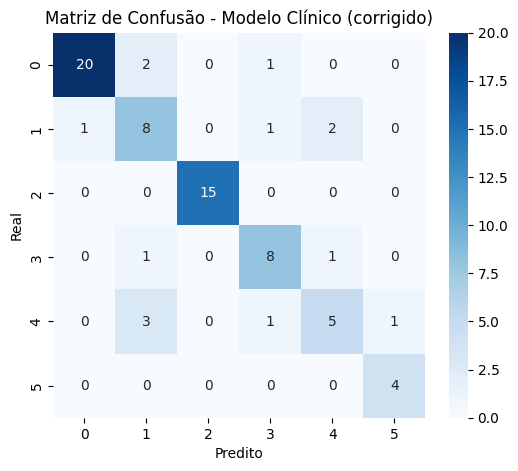

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yc_test, yc_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Modelo Clínico (corrigido)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [ ]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamanho treino (completo):", Xf_train.shape[0])
print("Tamanho teste (completo):", Xf_test.shape[0])

Tamanho treino (completo): 292
Tamanho teste (completo): 74


In [ ]:
rf_full = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_full.fit(Xf_train, yf_train)

yf_pred = rf_full.predict(Xf_test)

In [ ]:
print("Acurácia (completo):", accuracy_score(yf_test, yf_pred))
print("\nRelatório de classificação (completo):\n")
print(classification_report(yf_test, yf_pred))

Acurácia (completo): 0.9594594594594594

Relatório de classificação (completo):

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.96      0.96      0.96        74



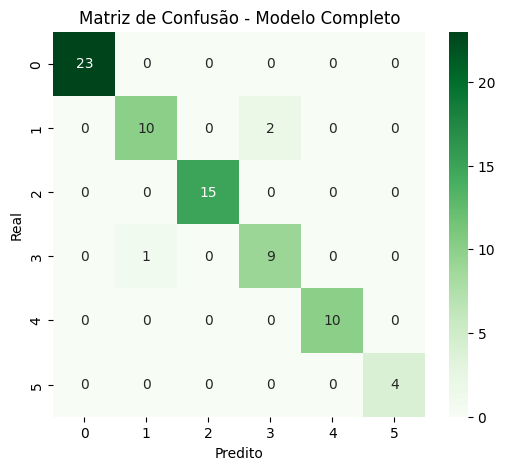

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(yf_test, yf_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - Modelo Completo")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


In [ ]:
acc_clinical = accuracy_score(yc_test, yc_pred)
acc_full = accuracy_score(yf_test, yf_pred)

bal_acc_clinical = balanced_accuracy_score(yc_test, yc_pred)
bal_acc_full = balanced_accuracy_score(yf_test, yf_pred)

print("Acurácia (clínico):", round(acc_clinical, 3))
print("Acurácia (completo):", round(acc_full, 3))
print("Balanced Acc (clínico):", round(bal_acc_clinical, 3))
print("Balanced Acc (completo):", round(bal_acc_full, 3))


Acurácia (clínico): 0.811
Acurácia (completo): 0.959
Balanced Acc (clínico): 0.806
Balanced Acc (completo): 0.956


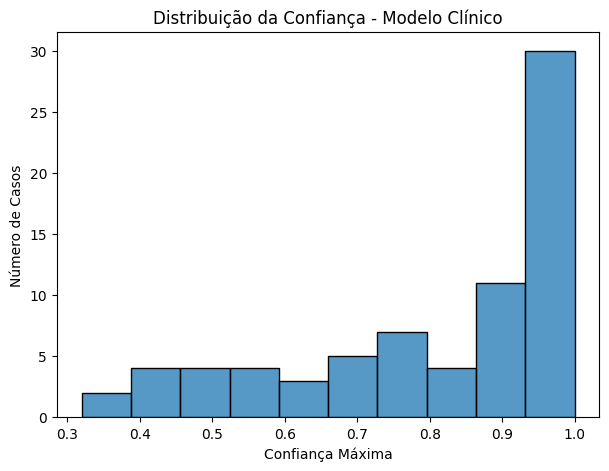

Exemplo de 10 primeiras confianças: [0.87724696 0.93       0.97       0.41       0.89       1.
 0.73       0.78       0.59       1.        ]


In [ ]:
yc_proba = rf_clinical.predict_proba(Xc_test)
yc_confidence = np.max(yc_proba, axis=1)

plt.figure(figsize=(7,5))
sns.histplot(yc_confidence, bins=10, kde=False)
plt.title("Distribuição da Confiança - Modelo Clínico")
plt.xlabel("Confiança Máxima")
plt.ylabel("Número de Casos")
plt.show()

print("Exemplo de 10 primeiras confianças:", yc_confidence[:10])


In [ ]:
limiar = 0.7
alta_conf = yc_confidence >= limiar
baixa_conf = yc_confidence < limiar

print(f"Total de casos no teste: {len(yc_confidence)}")
print(f"Casos de alta confiança (sem biópsia): {alta_conf.sum()} ({alta_conf.sum()/len(yc_confidence)*100:.1f}%)")
print(f"Casos de baixa confiança (recomendação de biópsia): {baixa_conf.sum()} ({baixa_conf.sum()/len(yc_confidence)*100:.1f}%)")

acc_alta = accuracy_score(yc_test[alta_conf], yc_pred[alta_conf])
print(f"Acurácia nos casos de alta confiança: {acc_alta:.3f}")


Total de casos no teste: 74
Casos de alta confiança (sem biópsia): 55 (74.3%)
Casos de baixa confiança (recomendação de biópsia): 19 (25.7%)
Acurácia nos casos de alta confiança: 0.964


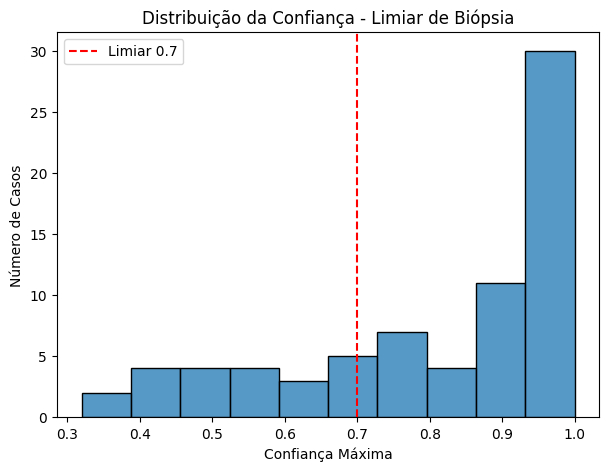

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(yc_confidence, bins=10, kde=False)
plt.axvline(limiar, color="red", linestyle="--", label=f"Limiar {limiar}")
plt.title("Distribuição da Confiança - Limiar de Biópsia")
plt.xlabel("Confiança Máxima")
plt.ylabel("Número de Casos")
plt.legend()
plt.show()


In [ ]:
limiares = [0.6, 0.7, 0.8, 0.9]
resultados = []

for lim in limiares:
    alta_conf = yc_confidence >= lim
    if alta_conf.sum() > 0:
        acc = accuracy_score(yc_test[alta_conf], yc_pred[alta_conf])
    else:
        acc = np.nan
    resultados.append({
        "limiar": lim,
        "sem_biopsia": alta_conf.sum(),
        "com_biopsia": len(yc_confidence) - alta_conf.sum(),
        "acuracia_sem_biopsia": acc
    })

pd.DataFrame(resultados)


,limiar,sem_biopsia,com_biopsia,acuracia_sem_biopsia
0,0.6,60,14,0.933333
1,0.7,55,19,0.963636
2,0.8,45,29,1.000000
3,0.9,38,36,1.000000


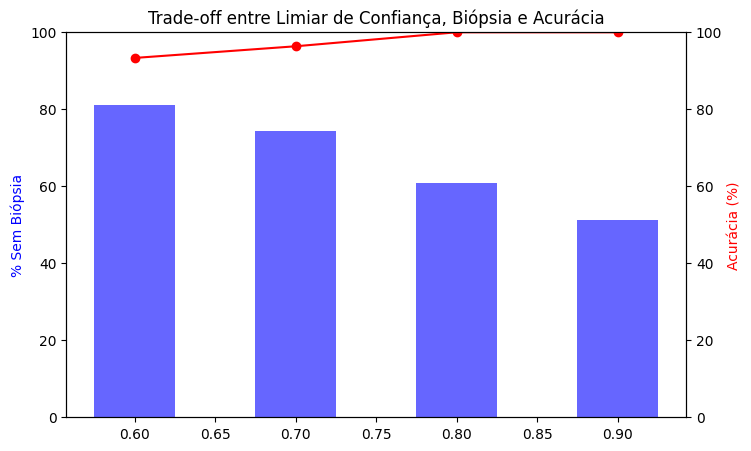

In [ ]:
df_limiares = pd.DataFrame(resultados)

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(df_limiares["limiar"], df_limiares["sem_biopsia"]/len(yc_confidence)*100,
        width=0.05, alpha=0.6, color="blue", label="% Sem Biópsia")
ax1.set_ylabel("% Sem Biópsia", color="blue")
ax1.set_ylim(0, 100)

ax2 = ax1.twinx()
ax2.plot(df_limiares["limiar"], df_limiares["acuracia_sem_biopsia"]*100,
         marker="o", color="red", label="Acurácia sem Biópsia")
ax2.set_ylabel("Acurácia (%)", color="red")
ax2.set_ylim(0, 100)

plt.title("Trade-off entre Limiar de Confiança, Biópsia e Acurácia")
plt.show()


In [ ]:

rf_clinical_base = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_clinical_cal = CalibratedClassifierCV(estimator=rf_clinical_base, method="isotonic", cv=3)
rf_clinical_cal.fit(Xc_train, yc_train)

yc_proba_cal = rf_clinical_cal.predict_proba(Xc_test)
yc_confidence_cal = np.max(yc_proba_cal, axis=1)

print("Exemplo de probabilidades calibradas (primeiros 5 casos):")
print(yc_proba_cal[:5])

Exemplo de probabilidades calibradas (primeiros 5 casos):
[[0.         0.84946372 0.         0.         0.15053628 0.        ]
 [0.00877193 0.         0.99122807 0.         0.         0.        ]
 [0.00877193 0.         0.         0.97973382 0.01149425 0.        ]
 [0.01061813 0.48102016 0.         0.07850275 0.42985896 0.        ]
 [0.04878049 0.02150538 0.         0.92971414 0.         0.        ]]


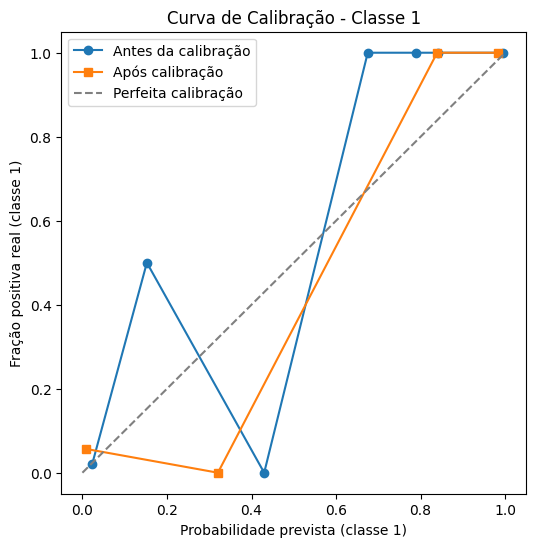

In [ ]:
proba_raw_class1 = yc_proba[:, 0]   #
proba_cal_class1 = yc_proba_cal[:, 0]

y_true_class1 = (yc_test == 1).astype(int)

prob_true_raw, prob_pred_raw = calibration_curve(y_true_class1, proba_raw_class1, n_bins=10, strategy='uniform')
prob_true_cal, prob_pred_cal = calibration_curve(y_true_class1, proba_cal_class1, n_bins=10, strategy='uniform')

plt.figure(figsize=(6,6))
plt.plot(prob_pred_raw, prob_true_raw, marker="o", label="Antes da calibração")
plt.plot(prob_pred_cal, prob_true_cal, marker="s", label="Após calibração")
plt.plot([0,1],[0,1], "--", color="gray", label="Perfeita calibração")
plt.xlabel("Probabilidade prevista (classe 1)")
plt.ylabel("Fração positiva real (classe 1)")
plt.title("Curva de Calibração - Classe 1")
plt.legend()
plt.show()


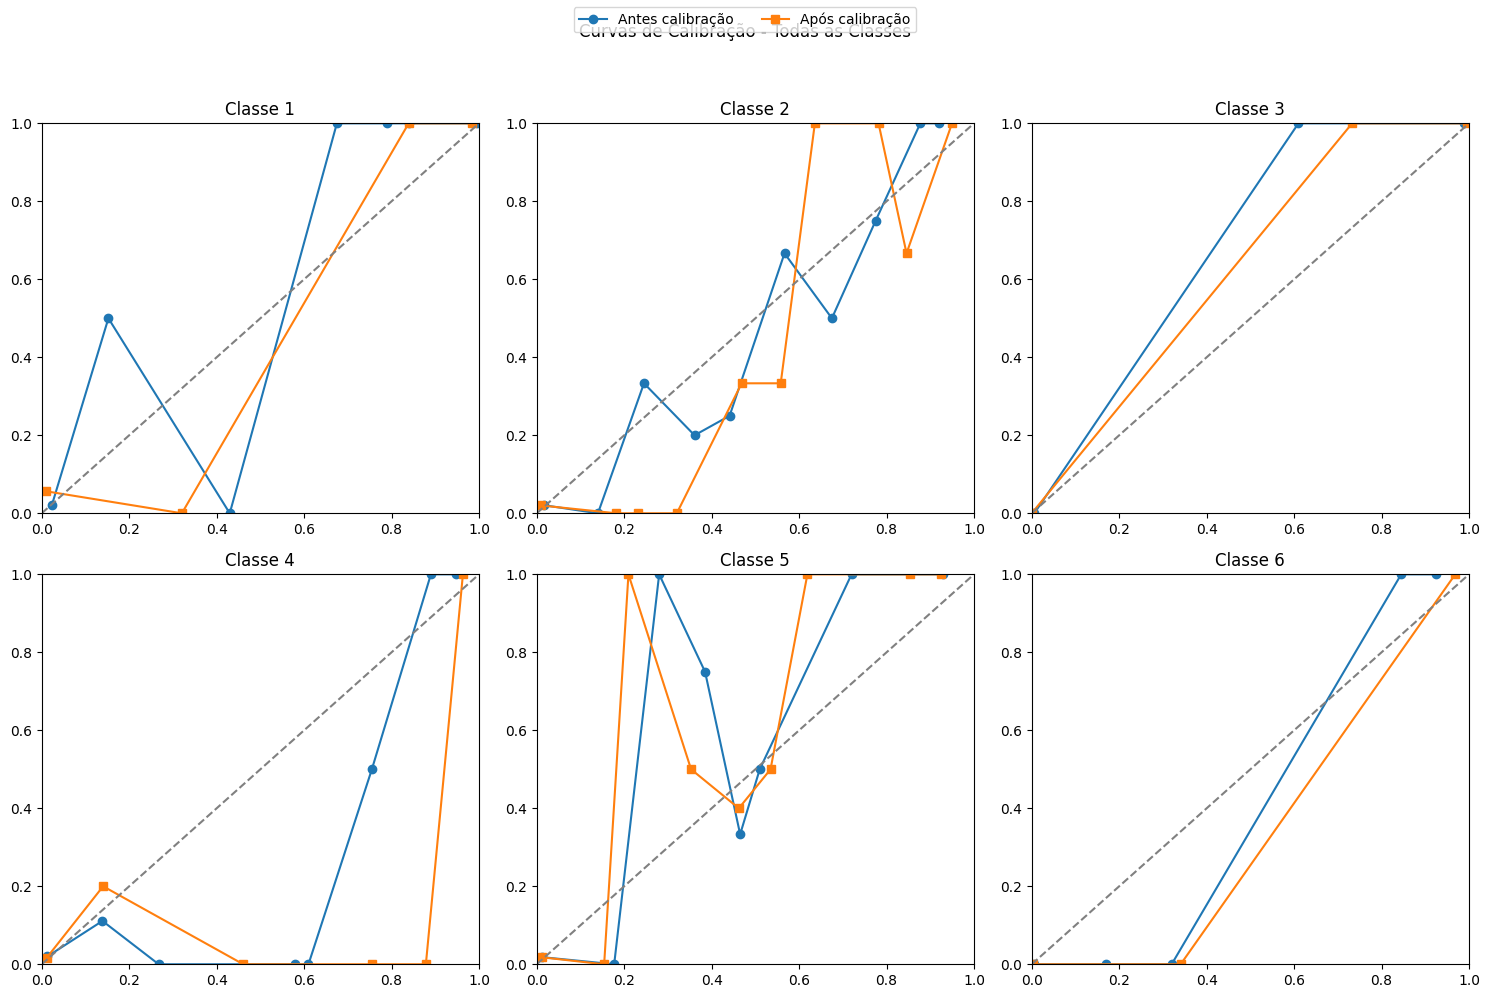

In [ ]:
classes = sorted(y.unique())
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for i, cls in enumerate(classes):
    row, col = divmod(i, 3)

    proba_raw = yc_proba[:, i]
    proba_cal = yc_proba_cal[:, i]

    y_true_bin = (yc_test == cls).astype(int)

    prob_true_raw, prob_pred_raw = calibration_curve(y_true_bin, proba_raw, n_bins=10, strategy='uniform')
    prob_true_cal, prob_pred_cal = calibration_curve(y_true_bin, proba_cal, n_bins=10, strategy='uniform')

    axes[row, col].plot(prob_pred_raw, prob_true_raw, marker="o", label="Antes calibração")
    axes[row, col].plot(prob_pred_cal, prob_true_cal, marker="s", label="Após calibração")
    axes[row, col].plot([0,1],[0,1], "--", color="gray")
    axes[row, col].set_title(f"Classe {cls}")
    axes[row, col].set_xlim([0,1])
    axes[row, col].set_ylim([0,1])

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2)
plt.suptitle("Curvas de Calibração - Todas as Classes")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


In [ ]:
alta_conf_cal = yc_confidence_cal >= 0.7
baixa_conf_cal = yc_confidence_cal < 0.7

print(f"Total de casos no teste: {len(yc_confidence_cal)}")
print(f"Casos de alta confiança (sem biópsia): {alta_conf_cal.sum()} ({alta_conf_cal.sum()/len(yc_confidence_cal)*100:.1f}%)")
print(f"Casos de baixa confiança (recomendação de biópsia): {baixa_conf_cal.sum()} ({baixa_conf_cal.sum()/len(yc_confidence_cal)*100:.1f}%)")

acc_alta_cal = accuracy_score(yc_test[alta_conf_cal], rf_clinical_cal.predict(Xc_test)[alta_conf_cal])
print(f"Acurácia nos casos de alta confiança (calibrado): {acc_alta_cal:.3f}")


Total de casos no teste: 74
Casos de alta confiança (sem biópsia): 61 (82.4%)
Casos de baixa confiança (recomendação de biópsia): 13 (17.6%)
Acurácia nos casos de alta confiança (calibrado): 0.934


In [ ]:
def calc_metrics(y_true, y_pred, labels):
    metrics = []
    for cls in labels:
        y_true_bin = (y_true == cls).astype(int)
        y_pred_bin = (y_pred == cls).astype(int)

        tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin).ravel()

        sensibilidade = tp / (tp + fn) if (tp + fn) > 0 else 0
        especificidade = tn / (tn + fp) if (tn + fp) > 0 else 0
        vpp = tp / (tp + fp) if (tp + fp) > 0 else 0
        vpn = tn / (tn + fn) if (tn + fn) > 0 else 0

        metrics.append({
            "Classe": cls,
            "Sensibilidade": sensibilidade,
            "Especificidade": especificidade,
            "VPP": vpp,
            "VPN": vpn
        })

    return pd.DataFrame(metrics)


In [ ]:
y_pred_cal = rf_clinical_cal.predict(Xc_test)

metrics_df = calc_metrics(yc_test.values, y_pred_cal, labels=sorted(y.unique()))
print("Métricas diagnósticas por classe (clínico calibrado, limiar 0.7):")
display(metrics_df)

print("\nMédias globais:")
print("Sensibilidade média:", metrics_df["Sensibilidade"].mean())
print("Especificidade média:", metrics_df["Especificidade"].mean())
print("VPP médio:", metrics_df["VPP"].mean())
print("VPN médio:", metrics_df["VPN"].mean())


Métricas diagnósticas por classe (clínico calibrado, limiar 0.7):


,Classe,Sensibilidade,Especificidade,VPP,VPN
0,1,0.869565,1.000000,1.000000,0.944444
1,2,0.833333,0.887097,0.588235,0.964912
2,3,1.000000,1.000000,1.000000,1.000000
3,4,0.800000,0.968750,0.800000,0.968750
4,5,0.600000,0.968750,0.750000,0.939394
5,6,1.000000,1.000000,1.000000,1.000000



Médias globais:
Sensibilidade média: 0.8504830917874395
Especificidade média: 0.970766129032258
VPP médio: 0.8563725490196079
VPN médio: 0.9695834440900231
